#**KNN Algorithm Assignment - 2**

Prepare a model for glass classification using KNN

Data Description:

RI : refractive index

Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

Mg: Magnesium

AI: Aluminum

Si: Silicon

K:Potassium

Ca: Calcium

Ba: Barium

Fe: Iron

Type: Type of glass: (class attribute)

1 -- building_windows_float_processed

 2 --building_windows_non_float_processed

 3 --vehicle_windows_float_processed

 4 --vehicle_windows_non_float_processed (none in this database)

 5 --containers

 6 --tableware

 7 --headlamps

 **Data:** glass.csv


## **Importing Necesssary Libraries**

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score

## **Importing Data**

In [3]:
Glass_data = pd.read_csv('glass.csv')
Glass_data.head(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## **Data Understanding**

In [4]:
Glass_data.shape

(214, 10)

In [5]:
Glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
Glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')

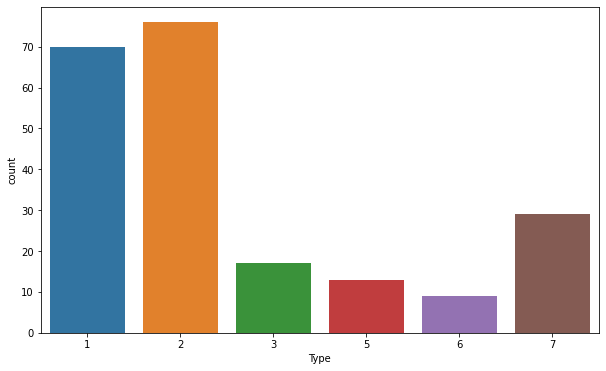

In [8]:
plt.figure(figsize = (10,6))
sns.countplot(Glass_data['Type'],)
plt.show()

By the above plot we clearly come to know that majority of animals grouped as **Type 1**

In [9]:
Glass_data.groupby(by = 'Type')['RI'].mean()

Type
1    1.518718
2    1.518619
3    1.517964
5    1.518928
6    1.517456
7    1.517116
Name: RI, dtype: float64

In [10]:
Glass_data.groupby(by = 'Type')['Na'].mean()

Type
1    13.242286
2    13.111711
3    13.437059
5    12.827692
6    14.646667
7    14.442069
Name: Na, dtype: float64

In [11]:
Glass_data.groupby(by = 'Type')['Mg'].mean()

Type
1    3.552429
2    3.002105
3    3.543529
5    0.773846
6    1.305556
7    0.538276
Name: Mg, dtype: float64

In [12]:
Glass_data.groupby(by = 'Type')['Al'].mean()

Type
1    1.163857
2    1.408158
3    1.201176
5    2.033846
6    1.366667
7    2.122759
Name: Al, dtype: float64

In [13]:
Glass_data.groupby(by = 'Type')['Si'].mean()

Type
1    72.619143
2    72.598026
3    72.404706
5    72.366154
6    73.206667
7    72.965862
Name: Si, dtype: float64

In [14]:
Glass_data.groupby(by = 'Type')['K'].mean()

Type
1    0.447429
2    0.521053
3    0.406471
5    1.470000
6    0.000000
7    0.325172
Name: K, dtype: float64

In [15]:
Glass_data.groupby(by = 'Type')['Ca'].mean()

Type
1     8.797286
2     9.073684
3     8.782941
5    10.123846
6     9.356667
7     8.491379
Name: Ca, dtype: float64

In [16]:
Glass_data.groupby(by = 'Type')['Ba'].mean()

Type
1    0.012714
2    0.050263
3    0.008824
5    0.187692
6    0.000000
7    1.040000
Name: Ba, dtype: float64

In [17]:
Glass_data.groupby(by = 'Type')['Fe'].mean()

Type
1    0.057000
2    0.079737
3    0.057059
5    0.060769
6    0.000000
7    0.013448
Name: Fe, dtype: float64

In [18]:
Glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [19]:
Glass_data['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [20]:
pd.crosstab(index = Glass_data['Fe'], columns = Glass_data['Type'])

Type,1,2,3,5,6,7
Fe,,,,,,
0.00,45,44,12,11,9,23
0.01,0,0,0,0,0,1
0.03,1,0,0,0,0,0
0.05,0,0,0,0,0,1
0.06,1,0,0,0,0,0
0.07,2,0,0,0,0,1
0.08,0,1,0,0,0,1
0.09,1,2,1,0,0,2
0.10,1,3,1,0,0,0


## **Model Building**

In [21]:
x = Glass_data.drop(labels='Type', axis=1)
y = Glass_data[['Type']]

In [22]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [23]:
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,stratify = y)

In [25]:
x_train.shape,x_test.shape

((171, 9), (43, 9))

In [26]:
y_train.shape,y_test.shape

((171, 1), (43, 1))

## **Model Training**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Model = KNeighborsClassifier(n_neighbors=3)
KNN_Model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
from sklearn.model_selection import cross_val_score
neighbours = list(range(1,50))
cv_scores = []

for i in neighbours:
    #print(i)
   KNN_Model = KNeighborsClassifier(n_neighbors = i)
   cv_score = cross_val_score(estimator = KNN_Model,X=x,y=y,cv=10)
    #print(i,'-',cv_score.mean())
   cv_scores.append(cv_score.mean())

In [39]:
cv_scores

[0.6502164502164502,
 0.6225108225108225,
 0.6502164502164502,
 0.6454545454545455,
 0.6454545454545455,
 0.6411255411255412,
 0.6270562770562771,
 0.617965367965368,
 0.5948051948051949,
 0.6136363636363636,
 0.5898268398268398,
 0.6088744588744589,
 0.6090909090909091,
 0.6136363636363636,
 0.6041125541125542,
 0.6181818181818182,
 0.6183982683982685,
 0.6324675324675325,
 0.637012987012987,
 0.6324675324675325,
 0.6277056277056278,
 0.6419913419913421,
 0.6231601731601732,
 0.6324675324675325,
 0.6186147186147186,
 0.6324675324675325,
 0.6279220779220779,
 0.6324675324675325,
 0.6277056277056278,
 0.6277056277056278,
 0.6229437229437229,
 0.6136363636363636,
 0.6136363636363636,
 0.6088744588744589,
 0.6041125541125542,
 0.6041125541125542,
 0.6134199134199134,
 0.59004329004329,
 0.5993506493506493,
 0.5852813852813853,
 0.5805194805194804,
 0.5807359307359306,
 0.5945887445887446,
 0.59004329004329,
 0.59025974025974,
 0.5807359307359308,
 0.5759740259740259,
 0.5712121212121212,


In [40]:
neighbours[cv_scores.index(max(cv_scores))]

1

In [69]:
# Rebuild the Model by choosing 1 as the nearest neighbour
KNN_Model_1 = KNeighborsClassifier(n_neighbors=1,weights= 'uniform')
KNN_Model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

## **Model Testing**

In [67]:
y_train_pred = KNN_Model_1.predict(x_train)

In [68]:
y_test_pred = KNN_Model_1.predict(x_test)

## **Model Evaluation**

In [62]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

For Train Data

In [63]:
accuracy_score(y_train,y_train_pred)

1.0

For Test Data

In [64]:
accuracy_score(y_test,y_test_pred)

0.627906976744186

# **OBSERVATION**
A small value of k could lead to overfitting, so we slightly increase the K value.

And also a big value of k can lead to underfitting.

In [135]:
# Rebuild the Model by choosing 1 as the nearest neighbour
KNN_Model_1 = KNeighborsClassifier(n_neighbors=10,weights= 'uniform')
KNN_Model_1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [130]:
y_train_pred = KNN_Model_1.predict(x_train)

In [131]:
y_test_pred = KNN_Model_1.predict(x_test)

In [132]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

For Train Data

In [133]:
accuracy_score(y_train,y_train_pred)

0.6900584795321637

For Test Data

In [134]:
accuracy_score(y_test,y_test_pred)

0.6976744186046512

## **Model Deployement**

In [33]:
from pickle import dump

In [34]:
dump(KNN_Model,open('KNN_Model_pkl','wb'))

In [35]:
from pickle import load

In [36]:
KNN_Model_Pickle = load(open('KNN_Model_pkl','rb'))

In [37]:
pickle_pred = KNN_Model_Pickle.predict(x_test)